In [17]:
# load the package
# the detail of code is in Crawler.py

from utils.Crawler import search_by_text
from utils.Crawler import search_by_location
from utils.Crawler import search_mention

In [12]:
help(search_by_text)

Help on function search_by_text in module utils.Crawler:

search_by_text(text='#reopen', start='2020-05-01', end='2020-06-01', numberOfTweets=100)
    the format should be: text, start, end, radius, numberOfTweets
    the default location is new york within 100km.
    text: the search key
    start, end: time constaint
    numberOfTweets: the number of tweets that you want to scrape.



## Scraping tweets from a text search query

In [13]:
# The search key of transportation: #PublicTransit, #transit, #subway, #car, #bus 
# the search key of stay-at-home: #StayAtHome
# the search key of reopen: #reopen, #WFH
# m = ['2021-01-01','2021-02-01','2021-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01']

'''
return to work
return to office
back to work
back to office
'''

# define a method to show the number of tweets each month from 2020-01 to 2020-12

def getNumberOfTweets(input):
    import numpy as np
    import pandas as pd
    
    m = ['2021-01-01','2021-02-01','2021-03-01','2021-04-01','20201-05-01']
    numberOfTweets = []
    for i in range(4):
        a = search_by_text("input", m[i], m[i+1], 300)
        numberOfTweets.append(a.shape[0])
        
    month = ['01 - 02',
         '02 - 03',
         '03 - 04',
         '04 - 05']
    df = pd.DataFrame(numberOfTweets)
    df.columns = ['number of tweets']
    df.index = month
    return df
    

In [9]:
getNumberOfTweets('#WFH')

,number of tweets
01 - 02,58
02 - 03,49
03 - 04,68
04 - 05,0


In [10]:
df_1 = getNumberOfTweets('#WFH')
df_2 = getNumberOfTweets('#StayAtHome')
df_3 = getNumberOfTweets('#reopen')
df_4 = getNumberOfTweets('return to work')

In [14]:
df_5 = getNumberOfTweets('back to work')
df_6 = getNumberOfTweets('return to office')
df_7 = getNumberOfTweets('back to office')


In [68]:
df_1.to_csv("1_data.csv")
df_2.to_csv("2_data.csv")
df_3.to_csv("3_data.csv")
df_4.to_csv("4_data.csv")
df_5.to_csv("5_data.csv")
df_6.to_csv("6_data.csv")
df_7.to_csv("7_data.csv")

In [18]:
import pandas as pd
df_1 = pd.read_csv('1_data.csv', names = ['month', 'number of tweets'], header= 0)
df_2 = pd.read_csv('2_data.csv', names = ['month', 'number of tweets'], header= 0)
df_3 = pd.read_csv('3_data.csv', names = ['month', 'number of tweets'], header= 0)
df_4 = pd.read_csv('4_data.csv', names = ['month', 'number of tweets'], header= 0)
df_5 = pd.read_csv('5_data.csv', names = ['month', 'number of tweets'], header= 0)
df_6 = pd.read_csv('6_data.csv', names = ['month', 'number of tweets'], header= 0)
df_7 = pd.read_csv('7_data.csv', names = ['month', 'number of tweets'], header= 0)

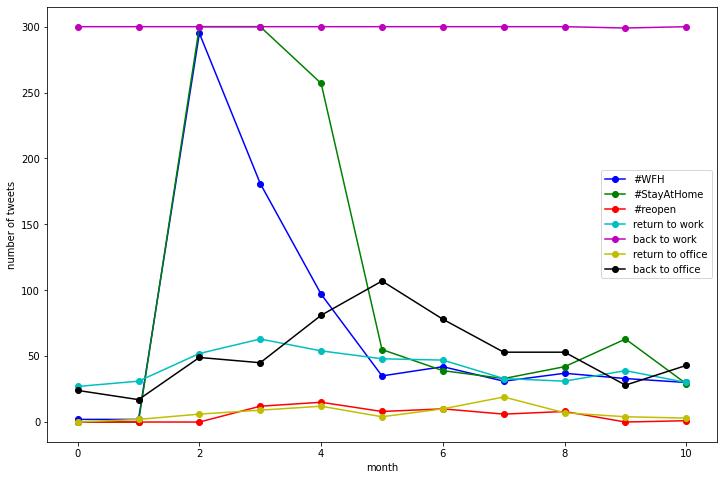

In [19]:
import matplotlib.pylab as plt 
import seaborn as sns 

fig,ax = plt.subplots(1,1,figsize=(12,8))

ax.plot(df_1['number of tweets'], 'o-', color='b',label='#WFH');
ax.plot(df_2['number of tweets'], 'o-', color='g', label='#StayAtHome');
ax.plot(df_3['number of tweets'], 'o-', color='r',label='#reopen');
ax.plot(df_4['number of tweets'], 'o-', color='c',label='return to work');
ax.plot(df_5['number of tweets'], 'o-', color='m',label='back to work');
ax.plot(df_6['number of tweets'], 'o-', color='y',label='return to office');
ax.plot(df_7['number of tweets'], 'o-', color='k',label='back to office');

ax.set_xlabel('month')
ax.set_ylabel('number of tweets')

ax.legend();


In [99]:
a = search_by_text('"back to work"', '2020-04-01','2020-05-01', 300)

In [102]:
a.content[80]

'i love being home, man. this 3 day weekend was exactly what i needed. then i got back to work tomorrow &amp; wednesday &amp; i’m off thursday again. i can’t even fuckin wait!!!'

## Scraping tweets in a specific location 

In [5]:
# Get the instruction of this method
# help(search_by_location)

df = search_by_location()
df.head()

Help on function search_by_location in module utils.Crawler:

search_by_location(text='#reopen', coordinates='40.730610,-73.935242, 500000mi', start='2020-03-01', end='2021-03-31', language='en', numberOfTweets=100)
    this method could location detail of tweets that include text you want.



,user,date,content
0,EddyOhno,2021-03-26 14:51:40+00:00,Broadway gets a shot in the arm toward safely ...
1,realalexnicoll,2021-03-17 23:17:10+00:00,Article in Ludlow (MA) ’s newspaper about the ...
2,denisequarles,2021-03-09 19:18:59+00:00,@kwanzahall enjoyed your convo w/Commissioner ...
3,macswimclub,2021-03-07 16:26:05+00:00,MAC’s swimmers initiated a powerful online pet...
4,Turning_MA_Red,2021-03-04 21:35:04+00:00,This nations future is being put at risk by th...


这里出现了一个问题！通过该种的方式搜索的tweet会有两种情况，一是geo-tagged的tweets，另一种是用户来自该坐标的tweets。在第一种情况下，用户可能没有在个人profile里表明自己的位置，但是在tweet下分享了自己的位置，所以被检索了出来；在第二种情况下，用户在个人profile里表明自己来自该地区，但发tweet的时候没有tag自己的位置，这时twitter的检索工具会把它作为来自该地理位置的tweet。

## Mentioned

In [9]:
search_mention('#bus')

,date,content,user,mentionedUsers
0,2021-05-03 16:04:45+00:00,#violence in #NYC #BROOKLYN and #education #bu...,crafted4u,"[{'username': 'NYCMayorsOffice', 'displayname'..."
1,2021-05-02 14:45:07+00:00,You're next in line! Grab the 3Dmate Design Ma...,the3dmate,"[{'username': 'style_rk', 'displayname': 'Ravi..."
2,2021-04-20 00:01:57+00:00,#yikes #22minutes til the next @mta #bus #newy...,IamNYSports,"[{'username': 'MTA', 'displayname': 'MTA. Wear..."
3,2021-03-15 13:06:44+00:00,#nyccommute #nyc #PABT #morningrush at worlds ...,barryjgrossman,"[{'username': 'CarenLissner', 'displayname': '..."
4,2021-02-28 19:23:52+00:00,Imagine getting drunk while drinking @HEBobiwi...,badruzwasaggo,"[{'username': 'HEBobiwine', 'displayname': 'BO..."
...,...,...,...,...
95,2015-04-20 21:37:19+00:00,Why the fuck do @MTA #buses crank the heat on ...,BriStob82,"[{'username': 'MTA', 'displayname': 'MTA. Wear..."
96,2014-10-09 22:46:31+00:00,C'mon @MTA #Bus - a line halfway down the widt...,SallyBenner,"[{'username': 'MTA', 'displayname': 'MTA. Wear..."
97,2014-09-02 10:55:02+00:00,Subway @subwayfreshbuzz. http://t.co/jVSKrDAL8...,dine_here,"[{'username': 'SubwayFreshBuzz', 'displayname'..."
98,2014-08-20 13:47:14+00:00,Thank you so much @WNYC for #discover. saving ...,jetandset_,"[{'username': 'WNYC', 'displayname': 'WNYC 🎙',..."


## Get the demographic information of user

In [1]:
from utils.Crawler import search_by_username

#run next line to get the instuction of how to use this method
#help(search_by_username)

# search_by_username(user_name, number_of_tweets)
search_by_username('trump')

Help on function search_by_username in module utils.Crawler:

search_by_username(username='jack', numberOfTweets=0)
    this method could get the demographic information of user
    username: the user that you want to search
    numberOfTweets: the number of tweets that you want to scrape.



,username,description,verified,followersCount,location
0,Trump,Official Twitter page of The @Trump Organizati...,True,565559,"New York, NY"


In [11]:

tweets_list = []

    # Using TwitterSearchScraper to scrape 100 records from username @jack
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'from:{username}').get_items()):
    
    if i > numberOfTweets:
        break
    tweets_list.append([tweet.user])
    
tweets_df = pd.DataFrame(tweets_list)
    

NameError: name 'sntwitter' is not defined

# Some addtional method

## Getting location from scraped tweets

## Hashtag 

In [4]:
import re

list1 = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper('reworking lang:en filter:hashtags').get_items()):
    if i > 100:
        break
    list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
df1 = pd.DataFrame(list1, columns = ['Datetime', 'Tweet_id', 'Text', 'Username'])

pattern = r'#(\w+)'
df1['hashtag'] = df1['Text'].apply(lambda x: re.findall(pattern, x))

df1.head()

,Datetime,Tweet_id,Text,Username,hashtag
0,2021-05-02 18:55:49+00:00,1388930241134014464,The 🇮🇹Ferrari 250 TR was the start of my dieca...,OlitzschG,[MayBuildOff]
1,2021-05-02 16:17:58+00:00,1388890519569240064,Been reworking the area around the first room ...,liquidmetalslim,"[DQB2, NintendoSwitch]"
2,2021-05-02 15:15:10+00:00,1388874715339448320,Giving this babe a facelift and reworking some...,SofiRami2,"[colombiana, workinprogress, acrylicpainting, ..."
3,2021-05-02 11:20:33+00:00,1388815668754231301,School education is always trying something ou...,JagersbergKnut,"[ArtificialIntelligence, MachineLearning, Digi..."
4,2021-05-02 00:32:48+00:00,1388652658450370563,Reworking the tile selection for doing things....,ThrallGames,"[gamedev, indiedev, indiegames, GameMaker, pix..."
